In [1]:
!git clone https://github.com/smestern/ipfx.git
!git clone https://github.com/smestern/example-abf-files.git

Cloning into 'ipfx'...
Checking out files:  75% (361/478)   
Checking out files:  76% (364/478)   
Checking out files:  77% (369/478)   
Checking out files:  78% (373/478)   
Checking out files:  79% (378/478)   
Checking out files:  80% (383/478)   
Checking out files:  81% (388/478)   
Checking out files:  82% (392/478)   
Checking out files:  83% (397/478)   
Checking out files:  84% (402/478)   
Checking out files:  85% (407/478)   
Checking out files:  86% (412/478)   
Checking out files:  87% (416/478)   
Checking out files:  88% (421/478)   
Checking out files:  89% (426/478)   
Checking out files:  90% (431/478)   
Checking out files:  91% (435/478)   
Checking out files:  92% (440/478)   
Checking out files:  93% (445/478)   
Checking out files:  94% (450/478)   
Checking out files:  95% (455/478)   
Checking out files:  96% (459/478)   
Checking out files:  97% (464/478)   
Checking out files:  98% (469/478)   
Checking out files:  99% (474/478)   
Checking out files: 100% (4

In [2]:
!apt-get install -qq /content/ipfx
!pip install -q /content/ipfx --log /content/log.txt
!pip install statsmodels==0.9.0

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
Invalid requirement: '/content/ipfx'
Traceback (most recent call last):
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1654, in parseString
    raise exc
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1644, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3417, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\Allose\Anaconda3\lib\site-packages\pip\_vendor\

In [19]:
ipfx

NameError: name 'ipfx' is not defined

In [28]:
#!/bin/env python
import shutil
import os
import argparse
import logging
log = logging.getLogger(__name__)
import pyabf
from ipfx.x_to_nwb.ABFConverter import ABFConverter
from ipfx.x_to_nwb.DatConverter import DatConverter
import numpy as np

def convert(inFileOrFolder, overwrite=False, fileType=None, outputMetadata=False, outputFeedbackChannel=False, multipleGroupsPerFile=False, compression=True):
    """
    Convert the given file to a NeuroDataWithoutBorders file using pynwb
    Supported fileformats:
        - ABF v2 files created by Clampex
        - DAT files created by Patchmaster v2x90
    :param inFileOrFolder: path to a file or folder
    :param overwrite: overwrite output file, defaults to `False`
    :param fileType: file type to be converted, must be passed iff `inFileOrFolder` refers to a folder
    :param outputMetadata: output metadata of the file, helpful for debugging
    :param outputFeedbackChannel: Output ADC data which stems from stimulus feedback channels (ignored for DAT files)
    :param multipleGroupsPerFile: Write all Groups in the DAT file into one NWB
                                  file. By default we create one NWB per Group (ignored for ABF files).
    :param compression: Toggle compression for HDF5 datasets
    :return: path of the created NWB file
    """

    if not os.path.exists(inFileOrFolder):
        raise ValueError(f"The file {inFileOrFolder} does not exist.")

    if os.path.isfile(inFileOrFolder):
        root, ext = os.path.splitext(inFileOrFolder)
    if os.path.isdir(inFileOrFolder):
        if not fileType:
            raise ValueError("Missing fileType when passing a folder")

        inFileOrFolder = os.path.normpath(inFileOrFolder)
        inFileOrFolder = os.path.realpath(inFileOrFolder)

        ext = fileType
        root = os.path.join(inFileOrFolder, "..",
                            os.path.basename(inFileOrFolder))

    outFile = root + ".nwb"

    if not outputMetadata and os.path.exists(outFile):
        if overwrite:
            os.remove(outFile)
        else:
            raise ValueError(f"The output file {outFile} does already exist.")

    if ext == ".abf":
        if outputMetadata:
            ABFConverter.outputMetadata(inFileOrFolder)
        else:
            ABFConverter(inFileOrFolder, outFile, outputFeedbackChannel=outputFeedbackChannel, compression=compression)
    elif ext == ".dat":
        if outputMetadata:
            DatConverter.outputMetadata(inFileOrFolder)
        else:
            DatConverter(inFileOrFolder, outFile, multipleGroupsPerFile=multipleGroupsPerFile, compression=compression)

    else:
        raise ValueError(f"The extension {ext} is currently not supported.")

    return outFile

In [32]:
NHPPath = "/examples/"

os.getcwd()
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
print("Converting" + NHPPath)
for r, celldir, f in os.walk(NHPPath):
    for c in celldir: ##Walks through each folder (cell folder) in the root folder
        c = os.path.join(r, c) ##loads the subdirectory path
        shutil.copy("/content/example-abf-files/mcc-settings.json",c) ### this path should point todays the mcc-settings.json we created earlier.
                                                                                ## copys the mcc-settings.json into the cell folder for conversion. 
                                                                       ##otherwise throws an error
        print(f"Converting {c}")
        convert(c, overwrite=True,
                        fileType='.abf',
                        outputMetadata=False,
                        outputFeedbackChannel=False,
                        multipleGroupsPerFile=True,
                        compression=True) ## this calls the conver command. It tells the command to look for all possible ABF files in the sub-folder.

Converting/examples/


In [25]:
from ipfx.x_to_nwb import ABFConverter

In [27]:
ABFConverter.ABFConverter('examples/Cell1/18823042.abf', 'output/18823042.nwb', 'outputFeedback')

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:135: UserWarning: Could not find the JSON file examples/Cell1/18823042.json with settings.
  warnings.warn(f"Could not find the JSON file {settings} with settings.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\file.py:752: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:444: UserWarning: Could not find the scale factor for the stimset 1Sridevi Vsweeps ttl  downchirp, using 1.0 as fallback.
  warnings.warn(f"Could not find the scale factor for the stimset {stimset}, using 1.0 as fallback.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'V' for VoltageClampStimulusSeries 'index_00' is ignored and will be set to 'volts' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nw

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:469: UserWarning: Could not find settings for amplifier unknown of channel Im_prim.
  warnings.warn(f"Could not find settings for amplifier {amplifier} of channel {adcName}.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'A' for VoltageClampSeries 'index_18' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nwb_version))
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:469: UserWarning: Could not find settings for amplifier unknown of channel Vm_sec.
  warnings.warn(f"Could not find settings for amplifier {amplifier} of channel {adcName}.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'V' for VoltageClampSeries 'index_19' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nwb_version))
C

In [9]:
ABFConverter.ABFConverter('examples/JS-A2-C03(350)-P01-2017_10_13_0013.abf', 'output/JS-A2-C03(350)-P01-2017_10_13_0013.nwb', 'outputFeedback/')

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:135: UserWarning: Could not find the JSON file examples/JS-A2-C03(350)-P01-2017_10_13_0013.json with settings.
  warnings.warn(f"Could not find the JSON file {settings} with settings.")
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:444: UserWarning: Could not find the scale factor for the stimset Monkey_1000 ms step, using 1.0 as fallback.
  warnings.warn(f"Could not find the scale factor for the stimset {stimset}, using 1.0 as fallback.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'A' for CurrentClampStimulusSeries 'index_00' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nwb_version))
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'A' for CurrentClampStimulusSeries 'index_01' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  % (cur

In [1]:

# Load IPFX libraries
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/JS-A2-C03(350)-P01-2017_10_13_0013.nwb"

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name, ontology="ipfx/ipfx/defaults/stimulus_ontology.json") ##loads nwb file into ipfx data structure

#sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]

loading dataset into data structure...


In [2]:
data_set


In [54]:

from ipfx.data_set_features import extract_data_set_features

# Calculate ephys features
cell_features, sweep_features, cell_record, sweep_records, _, _ = extract_data_set_features(data_set)

# print cell_record
cell_features

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms st

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms st

{'long_squares': None, 'short_squares': None, 'ramps': None}

In [55]:
sweep_records

[{'bridge_balance_mohm': None,
  'clamp_mode': 'CurrentClamp',
  'leak_pa': None,
  'stimulus_code': 'Monkey_1000 ms step',
  'stimulus_code_ext': 'Monkey_1000 ms step',
  'stimulus_name': 'Unknown',
  'stimulus_scale_factor': 1.0,
  'stimulus_units': 'Amps',
  'sweep_number': 0,
  'peak_deflection': None,
  'num_spikes': 0},
 {'bridge_balance_mohm': None,
  'clamp_mode': 'CurrentClamp',
  'leak_pa': None,
  'stimulus_code': 'Monkey_1000 ms step',
  'stimulus_code_ext': 'Monkey_1000 ms step',
  'stimulus_name': 'Unknown',
  'stimulus_scale_factor': 1.0,
  'stimulus_units': 'Amps',
  'sweep_number': 1,
  'peak_deflection': None,
  'num_spikes': 0},
 {'bridge_balance_mohm': None,
  'clamp_mode': 'CurrentClamp',
  'leak_pa': None,
  'stimulus_code': 'Monkey_1000 ms step',
  'stimulus_code_ext': 'Monkey_1000 ms step',
  'stimulus_name': 'Unknown',
  'stimulus_scale_factor': 1.0,
  'stimulus_units': 'Amps',
  'sweep_number': 2,
  'peak_deflection': None,
  'num_spikes': 0},
 {'bridge_balanc

In [28]:
sweep_features

{}

In [57]:
long_square_sweeps = data_set.sweep_set()
long_square_sweeps

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms st

In [61]:
from ipfx.feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor

import ipfx.stimulus_protocol_analysis as spa
from ipfx.epochs import get_stim_epoch
import matplotlib.pyplot as plt


# get sweep table of Long Square sweeps
long_square_table = data_set.filtered_sweep_table(
    stimuli=data_set.ontology.long_square_names
)
long_square_sweeps = data_set.sweep_set(long_square_table.sweep_number)

long_square_sweeps = data_set.sweep_set()

# Select epoch corresponding to the actual recording from the sweeps
# and align sweeps so that the experiment would start at the same time
long_square_sweeps.select_epoch("recording")
long_square_sweeps.align_to_start_of_epoch("experiment")

# find the start and end time of the stimulus
# (treating the first sweep as representative)
#stim_start_index, stim_end_index = get_stim_epoch(long_square_sweeps.i[0])
 #stim_start_time = long_square_sweeps.t[0][stim_start_index]
# stim_end_time = long_square_sweeps.t[0][stim_end_index]

stim_start_time = 0.8
stim_end_time = 1.8

# build the extractors
spfx = SpikeFeatureExtractor(start=stim_start_time, end=stim_end_time, filter = 1)
sptfx = SpikeTrainFeatureExtractor(start=stim_start_time, end=stim_end_time)

# run the analysis and print out a few of the features
long_square_analysis = spa.LongSquareAnalysis(spfx, sptfx, subthresh_min_amp=-100.0)
data = long_square_analysis.analyze(long_square_sweeps)

fields_to_print = [
    'tau',
    'v_baseline',
    'input_resistance',
    'vm_for_sag',
    'fi_fit_slope',
    'sag',
    'rheobase_i'
]

for field in fields_to_print:
    print("%s: %s" % (field, str(data[field])))

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms st

tau: nan
v_baseline: -42.02229243963957
input_resistance: 340.63720703125
vm_for_sag: -91.90674
fi_fit_slope: 0.07029780564263313
sag: 138.640625
rheobase_i: 50.0


C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: Monkey_1000 ms step
  warnings.warn("Could not find stimulus: %s" % tag)


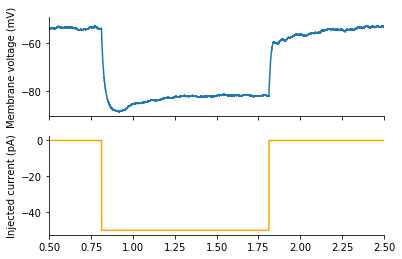

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 3 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set(sweep_plot_index).sweeps[0]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(.5, 2.5)
axes[0].set_ylabel("Membrane voltage (mV)")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("Injected current (pA)")

sns.despine()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 11 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set

curr_sweep(1)

ValueError: Found multiple stimulus TimeSeries in NWB file for sweep number 1.

In [14]:

def summarize_cell_ephys_features(lsa_results):
    hero_keep_features = ['adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi', 'median_isi', 
                          'stim_amp']
    rheo_keep_features = ['threshold_v', 'peak_v', 'trough_v', 
     'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio', 'peak_t', 'fast_trough_t', 'trough_t']
    
    overall_cell_keep_features = ['v_baseline', 'rheobase_i', 'fi_fit_slope', 
                                  'sag', 'vm_for_sag', 'input_resistance', 'tau']
    
    hero_small_dict = lsa_results['hero_sweep'][hero_keep_features]
    rheobase_sweep_index = lsa_results['rheobase_sweep'].name
    rheobase_sweep = lsa_results['spikes_set'][rheobase_sweep_index].iloc[0]
    
    rheo_spike_small_dict = rheobase_sweep[rheo_keep_features]
    rheo_first_isi = lsa_results['rheobase_sweep']['first_isi']
    rheo_spike_small_dict['rheo_first_isi'] = rheo_first_isi

    spike_comb_dict = {**hero_small_dict, **rheo_spike_small_dict}

    overall_cell_features = {x: lsa_results[x] for x in overall_cell_keep_features if x in lsa_results}
    final_cell_feature_dict = {**spike_comb_dict, **overall_cell_features}
    return(final_cell_feature_dict)

In [24]:

summarize_cell_ephys_features(data)

NameError: name 'data' is not defined

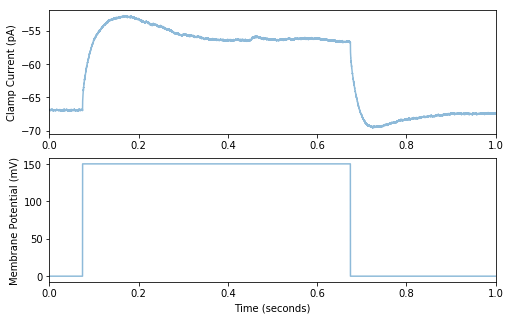

In [73]:
### Import statements
import pyabf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# refers to example_datasets folder in github repo
file_rel_path = 'examples/Cell3/'

curr_file = '2020_03_02_0023.abf'
abf_file_path = file_rel_path + curr_file

abf = pyabf.ABF(abf_file_path) # this is the basic function for accessing abf files

### Configuration variables
stim_channel_num = 1 # on which channel number is the stimulus?
response_chan_num = 0 # on which channel number is the response?

stim_gain = 1 # integer gain on stimulus
response_gain = 1 # integer gain on response

stim_end = 1 # time point where stimulus ends

sweep_plot_list = [11] # sweeps we want to plot
fig = plt.figure(figsize=(8, 5))

### Figure plotting
for i in sweep_plot_list:
    sweep_num = i
    
    # this setSweep command sets the currently active sweep in the file
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    abf.setSweep(sweep_num, channel=stim_channel_num)
    ax2 = fig.add_subplot(212, sharex=ax1)  
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

In [69]:

# Load IPFX libraries

from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/18823042.nwb"

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name) ##loads nwb file into ipfx data structure

# sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]

loading dataset into data structure...


ValueError: Found multiple stimulus series {[s.name for s in matching_series]} for sweep number {sweep_number}